<a href="https://colab.research.google.com/github/mefy-Aruna/New/blob/master/CKDmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd


In [3]:
data1= pd.read_csv('new.csv')
data1


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.364507,1.0,0.0,0.0,121.000000,36.0,1.2,135.297553,3.000617,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.464166,1.0,0.0,0.0,134.383588,18.0,0.8,131.564702,4.401237,11.3,38.0,6000.0,4.751465,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.000000,1.0,0.0,0.0,423.000000,53.0,1.8,134.149877,6.809881,9.6,31.0,7500.0,3.939063,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.000000,0.0,1.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.000000,1.0,0.0,0.0,106.000000,26.0,1.4,137.978618,5.664116,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.000000,1.0,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.000000,1.0,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.000000,1.0,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.000000,1.0,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
x1= data1.iloc[:,0:24].values
y1=data1.iloc[:,24].values


In [ ]:
y2=[]

In [68]:
y1.shape

(400,)

In [11]:
for i in y1:
  if i>0.5:
    add=1
    y2.append(add)
  elif i<0.5:
    add=0
    y2.append(add)

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y2,test_size=0.20)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [100]:
rf = RandomForestClassifier(n_estimators=200,random_state=0,warm_start=True)
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))



[[29  0]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



sensitivity [0. 1. 1.]
specificity [1. 1. 0.]
sensitivity 1.0
specificity 1.0
Best Threshold=1.000000, G-Mean=1.000


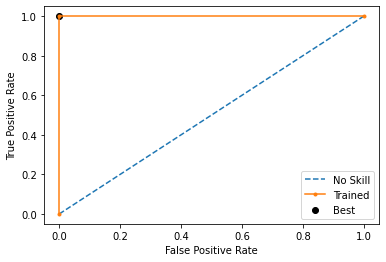

Best Threshold=1.000000
Best Threshold=1.000000, F-Score=1.000


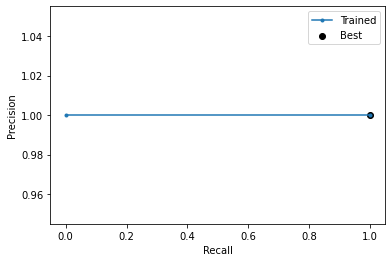

In [101]:
#ROC curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sensitivity = tpr #alpha
specificity= 1-fpr #beta

import numpy as np
sens_mean=np.median(sensitivity)
spec_mean=np.median(specificity)
print("sensitivity",sensitivity)
print("specificity",specificity)
print("sensitivity",sens_mean)
print("specificity",spec_mean)
# plot the roc curve for the model
from matplotlib import pyplot

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Trained')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# calculate roc curves
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.', label='Trained')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


In [102]:
rf = RandomForestClassifier(n_estimators=200,random_state=0,warm_start=True)
rf.fit(x_train,y_train)
y_pred= rf.predict(x_test)
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))



[[29  0]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [103]:

import pickle
filename = 'kid.pkl'
pickle.dump(rf, open(filename, 'wb'))

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

In [108]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import pandas as pd

In [109]:
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(32, input_dim=24, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(16, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 32)                800       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 2)                 34        
Total params: 1,362
Trainable params: 1,362
Non-trainable params: 0
_________________________________________________________________
None


In [110]:
# fit the model to the training data
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=300, batch_size=10)

Epoch 1/300
32/32 [==============================] - 0s 6ms/step - loss: 17.1077 - accuracy: 0.5594 - val_loss: 2.0888 - val_accuracy: 0.6375
Epoch 2/300
32/32 [==============================] - 0s 2ms/step - loss: 10.1319 - accuracy: 0.5656 - val_loss: 2.3396 - val_accuracy: 0.6375
Epoch 3/300
32/32 [==============================] - 0s 2ms/step - loss: 6.3915 - accuracy: 0.5688 - val_loss: 1.0775 - val_accuracy: 0.6375
Epoch 4/300
32/32 [==============================] - 0s 2ms/step - loss: 3.9803 - accuracy: 0.5406 - val_loss: 0.8032 - val_accuracy: 0.3625
Epoch 5/300
32/32 [==============================] - 0s 2ms/step - loss: 1.7187 - accuracy: 0.5375 - val_loss: 0.6957 - val_accuracy: 0.3625
Epoch 6/300
32/32 [==============================] - 0s 2ms/step - loss: 0.9794 - accuracy: 0.5125 - val_loss: 0.6917 - val_accuracy: 0.6375
Epoch 7/300
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.6187 - val_loss: 0.6876 - val_accuracy: 0.6375
Epoch 8/300

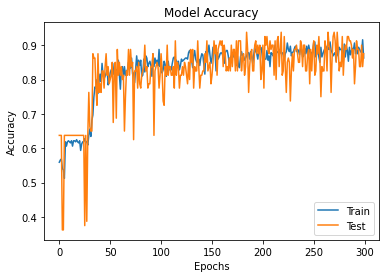

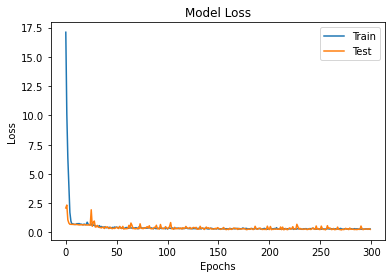

In [111]:
# Plot the model accuracy vs. number of Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [112]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model963.h5")
print("Saved model to disk")

Saved model to disk


In [113]:
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=24, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 16)                400       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_17 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 18        
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers

# define a function to build the keras model
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=24, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(8, kernel_initializer='normal', kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))
    
    # compile model
    adam = Adam(lr=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
    return model

model = create_model()

print(model.summary())

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 16)                400       
_________________________________________________________________
dropout_18 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 8)                 136       
_________________________________________________________________
dropout_19 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_38 (Dense)             (None, 2)                 18        
Total params: 554
Trainable params: 554
Non-trainable params: 0
_________________________________________________________________
None


In [117]:
# fit the model to the training data
history=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=300, batch_size=7,verbose=2)

Epoch 1/300
46/46 - 0s - loss: 0.2915 - accuracy: 0.8875 - val_loss: 0.2352 - val_accuracy: 0.9250
Epoch 2/300
46/46 - 0s - loss: 0.2824 - accuracy: 0.8844 - val_loss: 0.2586 - val_accuracy: 0.9000
Epoch 3/300
46/46 - 0s - loss: 0.3152 - accuracy: 0.8687 - val_loss: 0.3844 - val_accuracy: 0.8000
Epoch 4/300
46/46 - 0s - loss: 0.2964 - accuracy: 0.8656 - val_loss: 0.2320 - val_accuracy: 0.9375
Epoch 5/300
46/46 - 0s - loss: 0.3049 - accuracy: 0.8906 - val_loss: 0.2189 - val_accuracy: 0.9250
Epoch 6/300
46/46 - 0s - loss: 0.2925 - accuracy: 0.8750 - val_loss: 0.2704 - val_accuracy: 0.8875
Epoch 7/300
46/46 - 0s - loss: 0.2668 - accuracy: 0.9000 - val_loss: 0.2864 - val_accuracy: 0.8500
Epoch 8/300
46/46 - 0s - loss: 0.3007 - accuracy: 0.8906 - val_loss: 0.2652 - val_accuracy: 0.8750
Epoch 9/300
46/46 - 0s - loss: 0.3551 - accuracy: 0.8969 - val_loss: 0.3929 - val_accuracy: 0.8000
Epoch 10/300
46/46 - 0s - loss: 0.2668 - accuracy: 0.8844 - val_loss: 0.2613 - val_accuracy: 0.9250
Epoch 11/

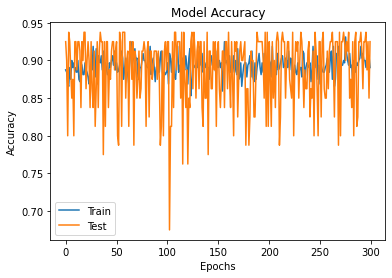

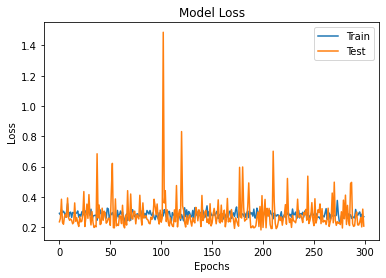

In [118]:
# Plot the model accuracy vs. number of Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [191]:
print(x_test.shape)
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)

(80, 24)
(320, 24)
(320,)
(80,)


In [119]:
def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, input_dim=24, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [120]:
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 32)                800       
_________________________________________________________________
dense_40 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_41 (Dense)             (None, 2)                 34        
Total params: 1,362
Trainable params: 1,362
Non-trainable params: 0
_________________________________________________________________
None


In [91]:
import numpy as np


In [121]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=7)

Epoch 1/300
46/46 [==============================] - 0s 4ms/step - loss: 5.9235 - accuracy: 0.5000 - val_loss: 0.7473 - val_accuracy: 0.3500
Epoch 2/300
46/46 [==============================] - 0s 2ms/step - loss: 0.7143 - accuracy: 0.5406 - val_loss: 0.6462 - val_accuracy: 0.5875
Epoch 3/300
46/46 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.6375 - val_loss: 0.6123 - val_accuracy: 0.6375
Epoch 4/300
46/46 [==============================] - 0s 2ms/step - loss: 0.6450 - accuracy: 0.6156 - val_loss: 0.7313 - val_accuracy: 0.6375
Epoch 5/300
46/46 [==============================] - 0s 2ms/step - loss: 0.7792 - accuracy: 0.5813 - val_loss: 0.5658 - val_accuracy: 0.8000
Epoch 6/300
46/46 [==============================] - 0s 2ms/step - loss: 0.5688 - accuracy: 0.6625 - val_loss: 0.5461 - val_accuracy: 0.8625
Epoch 7/300
46/46 [==============================] - 0s 2ms/step - loss: 0.5605 - accuracy: 0.6594 - val_loss: 0.5011 - val_accuracy: 0.7250
Epoch 8/300
4

In [122]:
import numpy as np


In [107]:
x_train= np.asarray(x_train)
x_test= np.asarray(x_test)
y_train=np.asarray(y_train)
y_test = np.asarray(y_test)

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=200, batch_size=7, verbose=2)

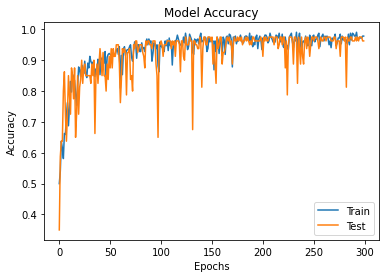

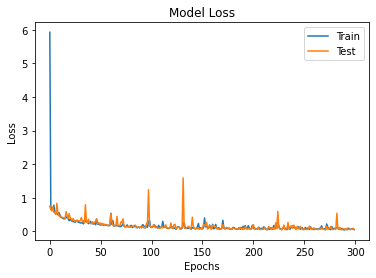

In [123]:
# Plot the model accuracy vs. number of Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [ ]:
predictions = np.argmax(model.predict(x_test), axis=1)
model_accuracy = accuracy_score(y_test, predictions)*100
print("Model Accuracy:", model_accuracy,"%")
print(classification_report(y_test, predictions))

In [126]:
model_json = model.to_json()
with open("kidNN.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("kidNN.h5")
print("Saved model to disk")

Saved model to disk


In [127]:
label =['Age','bp','sg','al','su','rbc','pc','pcc','ba','bgr','bu','sc','sod','pot','hb','pcv','wbc','rbc','hyp','dia','cad','app','PE','ane']

[3.31919395e-03 4.57839403e-03 1.09813618e-01 9.90201329e-02
 1.14418526e-02 1.07651331e-01 1.38668354e-02 1.21159095e-04
 8.23239435e-05 2.94068907e-02 2.33772317e-02 9.07187431e-02
 7.00809011e-03 9.84982420e-03 1.98287384e-01 1.50577122e-01
 3.50364102e-03 7.14928758e-02 3.42323533e-02 2.73415705e-02
 6.70526986e-05 1.84133329e-03 1.42495536e-03 9.76091444e-04]


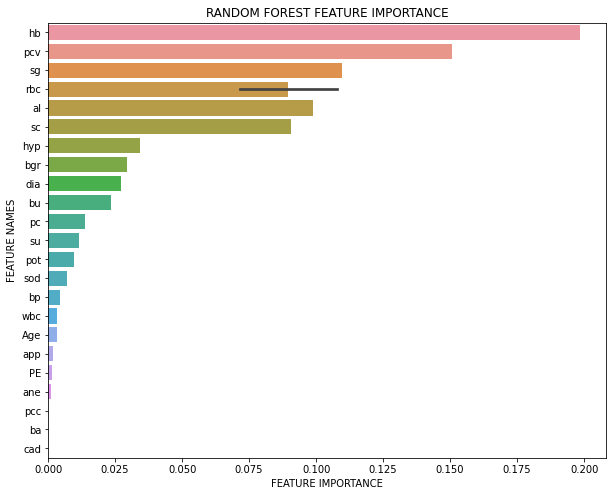

In [128]:
def plot_feature_importance(importance,names,model_type):
  feature_importance = np.array(importance)
  feature_names = np.array(names)
 
#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
 
#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  #Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(rf.feature_importances_,label,'RANDOM FOREST')
weight =rf.feature_importances_
print(weight)


In [129]:
# Train Test Split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
KNNclassifier = KNeighborsClassifier(n_neighbors = 100)
KNNclassifier.fit(x_train, y_train)
y_pred = KNNclassifier.predict(x_test)
print(classification_report(y_test, y_pred))
print('KNN acc:',accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.41      0.46        29
           1       0.70      0.78      0.74        51

    accuracy                           0.65        80
   macro avg       0.61      0.60      0.60        80
weighted avg       0.64      0.65      0.64        80

KNN acc: 0.65


In [140]:
from sklearn.tree import DecisionTreeClassifier
Decclassifier = DecisionTreeClassifier(criterion="entropy")
#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)
Decclassifier.fit(x_train,y_train)
y_pred12 = Decclassifier.predict(x_test)
print(classification_report(y_test, y_pred12))
print('Decision Classifier:',accuracy_score(y_test, y_pred12))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

Decision Classifier: 1.0


In [132]:

from sklearn.svm import SVC   # Support Vector Classifier
SVMclassifier = SVC(kernel ='rbf',probability=True)
#x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.20)
SVMclassifier.fit(x_train, y_train)
y_pred = SVMclassifier.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[ 0 29]
 [ 0 51]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.64      1.00      0.78        51

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

0.6375


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [141]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb.fit(x_train, y_train)

y_pred21 = gnb.predict(x_test)
print(classification_report(y_test, y_pred21))
print(accuracy_score(y_test, y_pred21))


              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.96      0.98        51

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

0.975


In [143]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(random_state=0, silent=True, metric='None', n_jobs=4)
lgb_clf.fit(x_train,y_train)
y_pred = lgb_clf.predict(x_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1.0


sensitivity [0. 1. 1.]
specificity [1. 1. 0.]
sensitivity 1.0
specificity 1.0
Best Threshold=1.000000, G-Mean=1.000


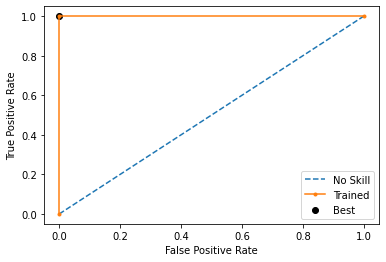

Best Threshold=1.000000
Best Threshold=1.000000, F-Score=1.000


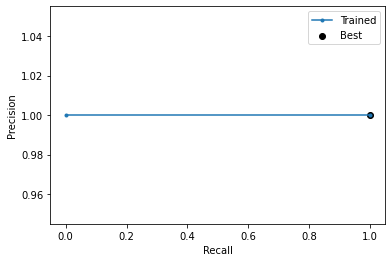

In [144]:
#ROC curves
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
sensitivity = tpr #alpha
specificity= 1-fpr #beta

import numpy as np
sens_mean=np.median(sensitivity)
spec_mean=np.median(specificity)
print("sensitivity",sensitivity)
print("specificity",specificity)
print("sensitivity",sens_mean)
print("specificity",spec_mean)
# plot the roc curve for the model
from matplotlib import pyplot

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Trained')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

# get the best threshold
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

# calculate roc curves
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
# plot the roc curve for the model
pyplot.plot(recall, precision, marker='.', label='Trained')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.show()


In [145]:
from sklearn.linear_model import Perceptron
cls= Perceptron(warm_start=True)
cls.fit(x_train,y_train)
y_pred = cls.predict(x_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))


[[ 0 29]
 [ 0 51]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        29
           1       0.64      1.00      0.78        51

    accuracy                           0.64        80
   macro avg       0.32      0.50      0.39        80
weighted avg       0.41      0.64      0.50        80

0.6375


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


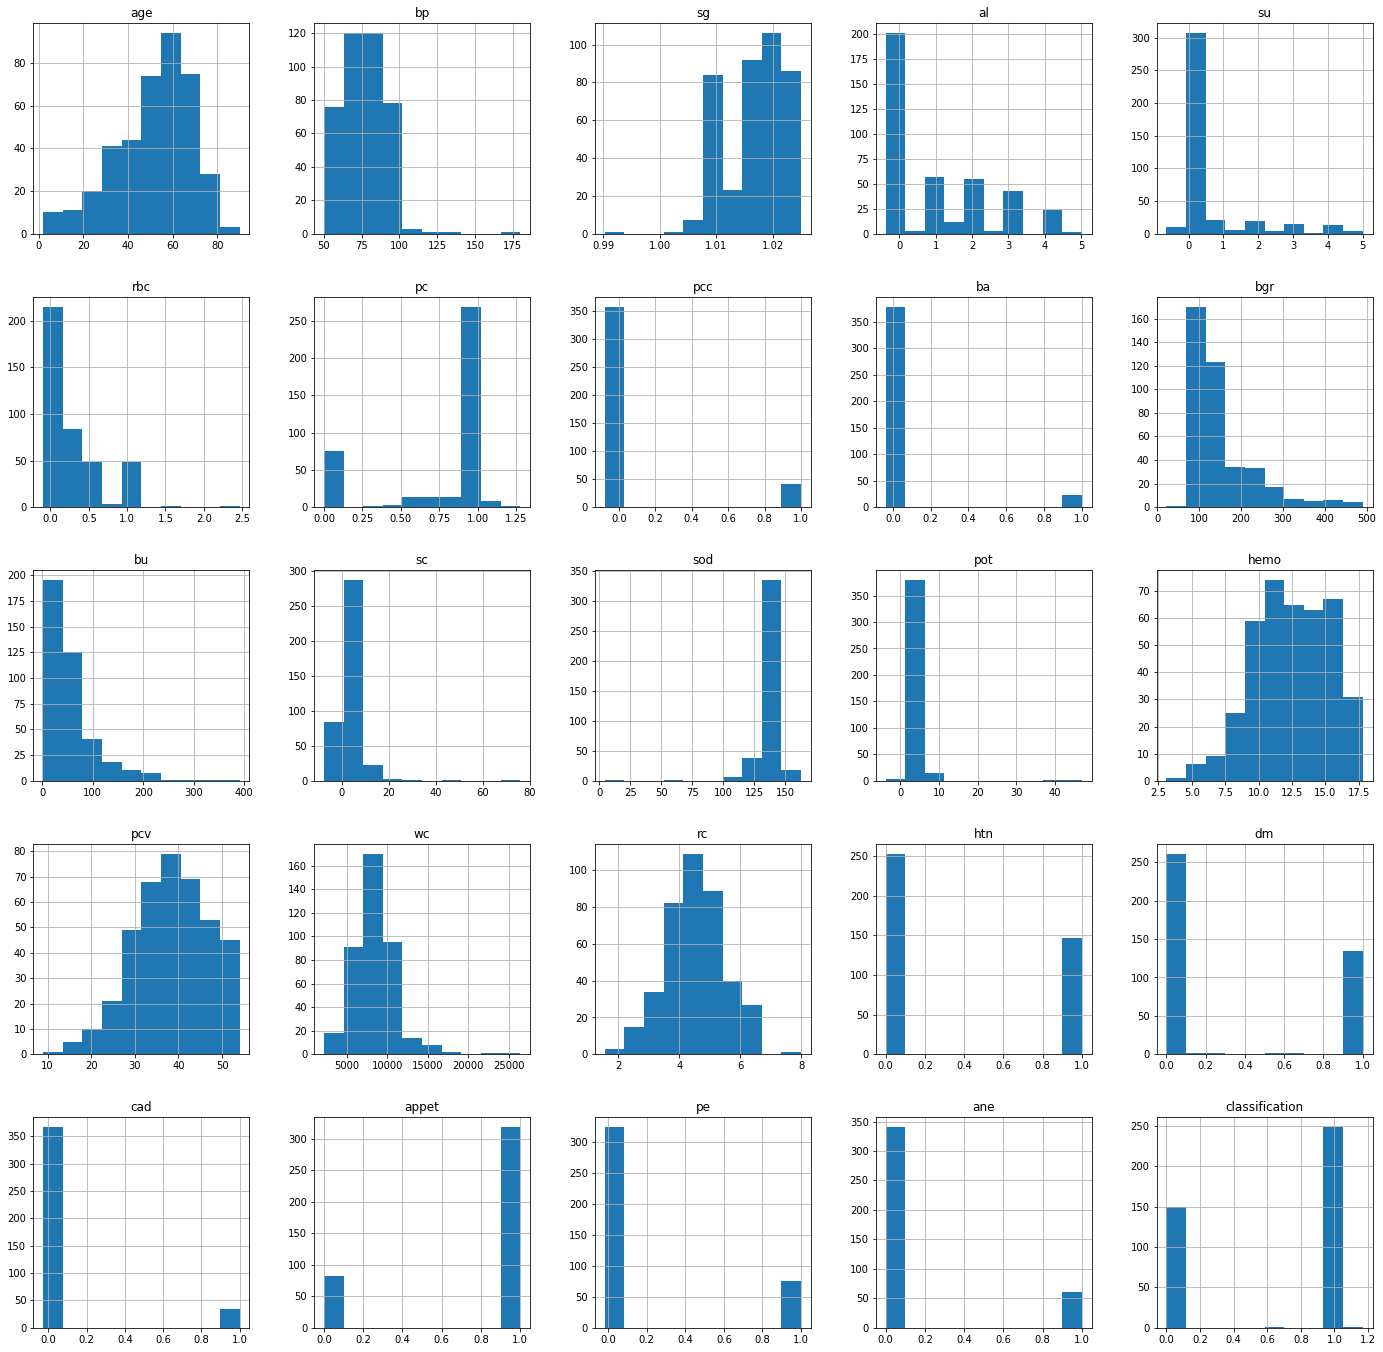

In [163]:
# plot histograms for each variable
data1.hist(figsize = (24, 24))
plt.show()

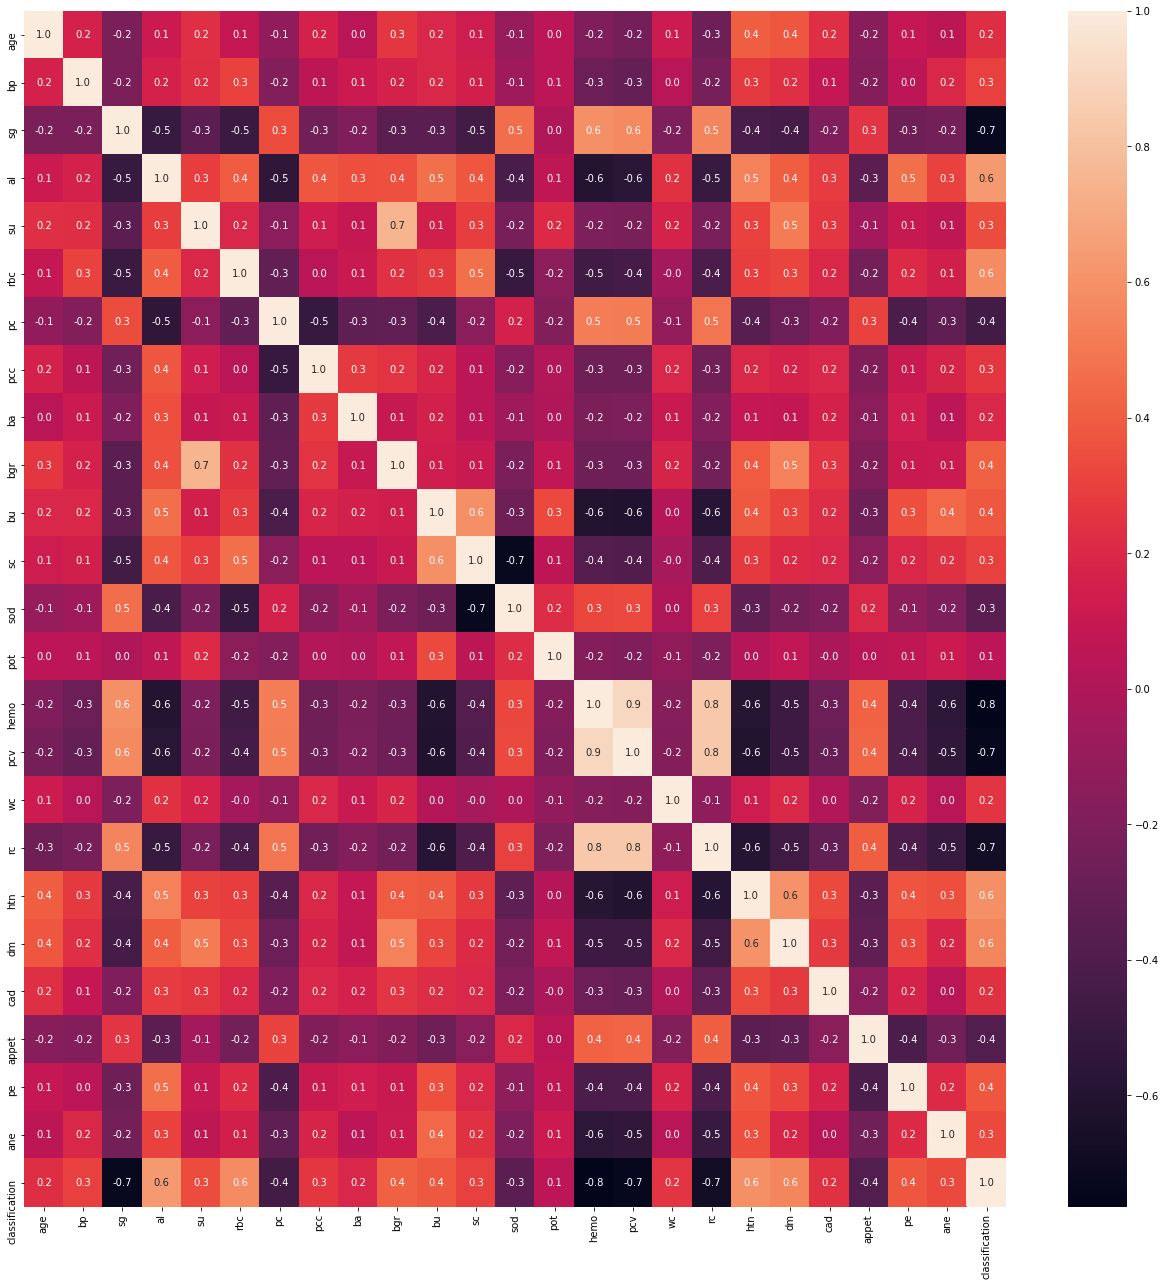

In [165]:
plt.figure(figsize=(22,22))
sns.heatmap(data1.corr(),annot=True,fmt='.1f')
plt.show()

[ 79   3 118 104   3 112   7   0   0  92  68  37   2 143 119  96  69 105
   4   0   0   0   2   0]


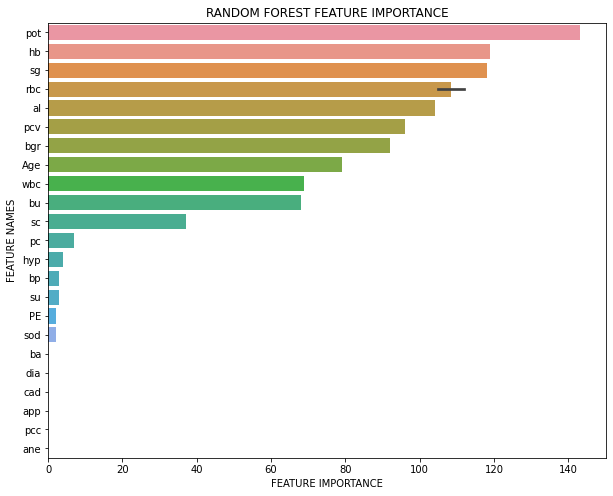

In [147]:
def plot_feature_importance(importance,names,model_type):
  feature_importance = np.array(importance)
  feature_names = np.array(names)
 
#Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)
 
#Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
  #Define size of bar plot
  plt.figure(figsize=(10,8))
#Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

plot_feature_importance(lgb_clf.feature_importances_,label,'RANDOM FOREST')
#weight =rf.feature_importances_
weight1= lgb_clf.feature_importances_
print(weight1)


In [149]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train = sc.fit_transform(x_train) 
X_test = sc.transform(x_test) 

In [152]:
from sklearn.linear_model import LogisticRegression
#x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.20)
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1.0


[[-0.29784179  0.2423845  -1.67225193  0.96282538  0.56254601  1.75210997
  -0.37136087  0.12427229  0.02922142  0.51359359  0.082154    0.25242032
  -0.34987613 -0.07950118 -1.24946715 -0.87382637  0.40047529 -0.57310192
   0.76115464  0.78945156  0.02748232 -0.45684315  0.59776535  0.14860649]]
Age
Feature: 0, Score: -0.29784
bp
Feature: 1, Score: 0.24238
sg
Feature: 2, Score: -1.67225
al
Feature: 3, Score: 0.96283
su
Feature: 4, Score: 0.56255
rbc
Feature: 5, Score: 1.75211
pc
Feature: 6, Score: -0.37136
pcc
Feature: 7, Score: 0.12427
ba
Feature: 8, Score: 0.02922
bgr
Feature: 9, Score: 0.51359
bu
Feature: 10, Score: 0.08215
sc
Feature: 11, Score: 0.25242
sod
Feature: 12, Score: -0.34988
pot
Feature: 13, Score: -0.07950
hb
Feature: 14, Score: -1.24947
pcv
Feature: 15, Score: -0.87383
wbc
Feature: 16, Score: 0.40048
rbc
Feature: 17, Score: -0.57310
hyp
Feature: 18, Score: 0.76115
dia
Feature: 19, Score: 0.78945
cad
Feature: 20, Score: 0.02748
app
Feature: 21, Score: -0.45684
PE
Featu

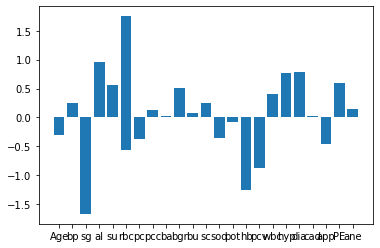

In [153]:
j=0
# get importance
importance = LR.coef_
print(importance)
# summarize feature importance
for i,v in enumerate(importance[0]):
  print(label[j])
  j=j+1
  print('Feature: %0d, Score: %.5f' % (i,v))
  
# plot feature importance
pyplot.bar([x for x in label], importance[0])
pyplot.show()

In [156]:
yp=[]

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.96      0.98        51

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80

0.975
[-0.00767282 -0.0063153  -0.15246647  0.08347223  0.02481996  0.12658992
  0.0140886   0.00585972 -0.0215313  -0.00134455 -0.0240318  -0.10123613
  0.00287515  0.02082754 -0.12458208 -0.05968567  0.03667837 -0.02166397
  0.05029386  0.02716257 -0.01511132 -0.00869484 -0.00575461 -0.01997598]
Age
Feature: 0, Score: -0.00767
bp
Feature: 1, Score: -0.00632
sg
Feature: 2, Score: -0.15247
al
Feature: 3, Score: 0.08347
su
Feature: 4, Score: 0.02482
rbc
Feature: 5, Score: 0.12659
pc
Feature: 6, Score: 0.01409
pcc
Feature: 7, Score: 0.00586
ba
Feature: 8, Score: -0.02153
bgr
Feature: 9, Score: -0.00134
bu
Feature: 10, Score: -0.02403
sc
Feature: 11, Score: -0.10124
s

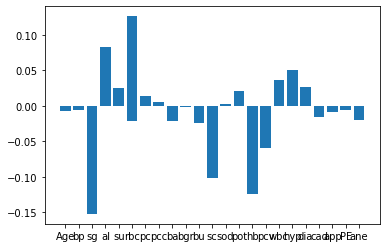

In [157]:
from sklearn.linear_model import LogisticRegression,LinearRegression
#x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.20)
Li = LinearRegression()
Li.fit(X_train,y_train)
y_predlr = Li.predict(X_test)
for i in y_predlr:
  if i>0.5:
    add=1
    yp.append(add)
  elif i<0.5:
    add=0
    yp.append(add)
print(classification_report(y_test, yp))
print(accuracy_score(y_test, yp))
j=0
# get importance
importance = Li.coef_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
  print(label[j])
  j=j+1
  print('Feature: %0d, Score: %.5f' % (i,v))
  
# plot feature importance
pyplot.bar([x for x in label], importance)
pyplot.show()

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.98      0.99        49

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

0.9875
[-0.00483306  0.00872655 -0.14911738  0.07662414  0.02630589  0.1139075
  0.03051004  0.0059623  -0.01968924  0.02221366 -0.01171378 -0.06787309
 -0.00623011  0.00759523 -0.12099587 -0.0552062   0.03019814 -0.03927717
  0.05613339  0.00236825 -0.01782157  0.00078686  0.00388346 -0.03286075]
Age
Feature: 0, Score: -0.00483
bp
Feature: 1, Score: 0.00873
sg
Feature: 2, Score: -0.14912
al
Feature: 3, Score: 0.07662
su
Feature: 4, Score: 0.02631
rbc
Feature: 5, Score: 0.11391
pc
Feature: 6, Score: 0.03051
pcc
Feature: 7, Score: 0.00596
ba
Feature: 8, Score: -0.01969
bgr
Feature: 9, Score: 0.02221
bu
Feature: 10, Score: -0.01171
sc
Feature: 11, Score: -0.06787
sod

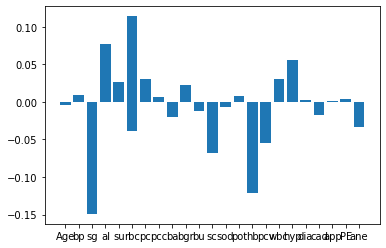

In [60]:
from sklearn.linear_model import LogisticRegression,LinearRegression
#x_train, x_test, y_train, y_test = train_test_split(x, ynew, test_size=0.20)
Li = LinearRegression()
Li.fit(X_train,y_train)
y_pred = Li.predict(X_test)
for i in y_pred:
  if i>0.5:
    add=1
    yp.append(add)
  elif i<0.5:
    add=0
    yp.append(add)
print(classification_report(y_test, yp))
print(accuracy_score(y_test, yp))
j=0
# get importance
importance = Li.coef_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
  print(label[j])
  j=j+1
  print('Feature: %0d, Score: %.5f' % (i,v))
  
# plot feature importance
pyplot.bar([x for x in label], importance)
pyplot.show()


In [158]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
importance = model.feature_importances_
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       0.98      1.00      0.99        51

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80

0.9875


In [159]:
yp=[]

[14:02:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1.0
Feature: 0, Score: 0.00003
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.19295
Feature: 3, Score: 0.01612
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.27200
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00044
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00012
Feature: 11, Score: 0.00013
Feature: 12, Score: 0.00001
Feature: 13, Score: 0.00001
Feature: 14, Score: 0.43917
Feature: 15, Score: 0.07901
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 

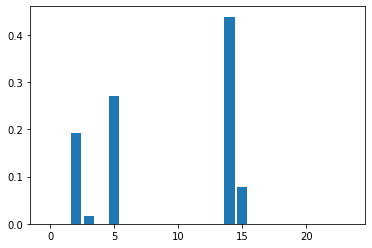

In [160]:

# xgboost for feature importance on a regression problem
from xgboost import XGBRegressor
from matplotlib import pyplot
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
importance = model.feature_importances_
y_pred = model.predict(X_test)
for i in y_pred:
  if i>0.5:
    add=1
    yp.append(add)
  elif i<0.5:
    add=0
    yp.append(add)
print(classification_report(y_test, yp))
print(accuracy_score(y_test, yp))
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00350
Feature: 3, Score: 0.00250
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00500
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00600
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000


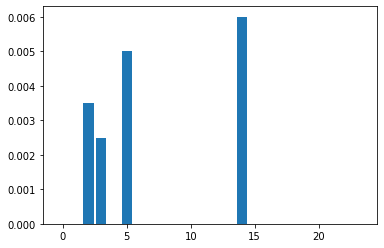

In [161]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

results = permutation_importance(rf, x1, y2, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [163]:
df= pd.read_csv('data1.csv')
df
#removed pus cell and pus cell clumps


,age,bp,sg,al,su,rbc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0.364507,0.0,121.000000,36.0,1.2,135.297553,3.000617,15.4,44.0,7800.0,5.200000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,7.0,50.0,1.020,4.0,0.0,0.464166,0.0,134.383588,18.0,0.8,131.564702,4.401237,11.3,38.0,6000.0,4.751465,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,62.0,80.0,1.010,2.0,3.0,0.000000,0.0,423.000000,53.0,1.8,134.149877,6.809881,9.6,31.0,7500.0,3.939063,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0.000000,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900000,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0.000000,0.0,106.000000,26.0,1.4,137.978618,5.664116,11.6,35.0,7300.0,4.600000,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,0.000000,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
396,42.0,70.0,1.025,0.0,0.0,0.000000,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
397,12.0,80.0,1.020,0.0,0.0,0.000000,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
398,17.0,60.0,1.025,0.0,0.0,0.000000,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900000,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [165]:
x= df.iloc[:,0:22].values
y=df.iloc[:,22].values


In [166]:
y1=[]

In [167]:
for i in y:
  if i>0.5:
    add=1
    y1.append(add)
  elif i<0.5:
    add=0
    y1.append(add)

In [168]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y1,test_size=0.20)


In [169]:
rand = RandomForestClassifier(n_estimators=200,random_state=0,warm_start=True)
rand.fit(x_train,y_train)
y_pred= rand.predict(x_test)
conf_matrix= confusion_matrix(y_test, y_pred)
print(conf_matrix)
print(classification_report(y_test, y_pred))



[[29  0]
 [ 0 51]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        51

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

